In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import dendrotweaks as dd
dd.__version__

'0.4.0'

In [3]:
dd.apply_dark_theme()

In [4]:
path_to_model = os.getcwd()
print(f'Path to model: {path_to_model}')
path_to_data = os.path.dirname(path_to_model)
print(f'Path to data: {path_to_data}')

Path to model: /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Test
Path to data: /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples


In [5]:
model = dd.Model(path_to_model, simulator_name='Jaxley')

In [6]:
model.load_morphology(file_name='ball-and-stick', soma_notation='3PS')

Sorted PointTree(root=Point(idx=0), num_nodes=17).
Apical dendrite is already aligned.
Extended 6 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=23).


In [7]:
# model.sec_tree[0]._ref.set('length', 20)
# model.sec_tree[0]._ref.set('radius', 10)

In [8]:
for sec in model.sec_tree[1:]:
    # print(sec._ref.ncomp)
    # sec._cell[sec.idx].set_ncomp(3)
    print(sec.nseg)
    sec.nseg = 3

1
1
1
1
1
1
1
1
1


In [9]:
# for sec in model.sec_tree:
#     for seg in sec.segments:
#         print(f'sec: {sec.idx}, seg: {seg.idx}, x: {seg.diam/2}')

In [10]:
model._cell.nodes

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param
0,0,0,0,20.000000,10.000000,5000.0,1.0,-70.0,0,0,0,0
1,0,1,0,42.426407,2.000000,5000.0,1.0,-70.0,0,1,1,0
2,0,1,1,42.426407,2.000000,5000.0,1.0,-70.0,0,1,2,0
3,0,1,2,42.426407,2.000000,5000.0,1.0,-70.0,0,1,3,0
4,0,2,0,42.426407,2.000000,5000.0,1.0,-70.0,0,2,4,0
5,0,2,1,42.426407,2.000000,5000.0,1.0,-70.0,0,2,5,0
6,0,2,2,42.426407,2.000000,5000.0,1.0,-70.0,0,2,6,0
7,0,3,0,96.666667,2.000000,5000.0,1.0,-70.0,0,3,7,0
8,0,3,1,96.666667,1.450000,5000.0,1.0,-70.0,0,3,8,0
9,0,3,2,96.666667,1.000000,5000.0,1.0,-70.0,0,3,9,0


In [11]:
model.sec_tree.topology()

parent |   idx
---------------
    -1 |   •0
     0 |   ├─•1
     0 |   ├─•2
     0 |   └─•3
     3 |     ├─•4
     4 |     │ ├─•5
     4 |     │ └─•6
     3 |     └─•7
     7 |       ├─•8
     7 |       └─•9


In [17]:
model.sec_tree[3]

JaxleySection(idx=3)

In [10]:
# model.sec_tree[4]._ref

In [11]:
model.add_default_mechanisms()

In [12]:
if model.simulator_name == 'NEURON':
    model.add_mechanism('stdNa')
    model.add_mechanism('stdKv')
    
elif model.simulator_name == 'Jaxley':
    model.add_mechanism(
        'stdNa',
        python_template_name='jaxley',
        load=False,
        dir_name='mod',
        recompile=False
    )

    model.add_mechanism(
        'stdKv',
        python_template_name='jaxley',
        load=False,
        dir_name='mod',
        recompile=False
    )

Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Test/biophys/python/stdNa.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Test/biophys/python/stdKv.py


In [13]:
model.mechanisms

{'Leak': <dendrotweaks.biophys.jaxley_mechanisms.JaxleyLeakChannel at 0x7f8a8c72a2d0>,
 'stdNa': <Mechnaism(stdNa)>,
 'stdKv': <Mechnaism(stdKv)>}

In [14]:
model.domains

{'apic': <Domain(apic, 7 sections)>,
 'dend': <Domain(dend, 2 sections)>,
 'soma': <Domain(soma, 1 sections)>}

In [15]:
model.domains_to_mechs

{'apic': set(), 'dend': set(), 'soma': set()}

In [16]:
for domain_name in model.domains:
    model.insert_mechanism('Leak', domain_name=domain_name)

In [17]:
for domain_name in model.domains:
    try:
        model.insert_mechanism('stdNa', domain_name=domain_name)
    except:
        pass

In [18]:
for domain_name in model.domains:
    try:
        model.insert_mechanism('stdKv', domain_name=domain_name)
    except:
        pass

In [19]:
model.distribute_all()

Error distributing parameter 'ena': "Key 'ena' not found in nodes or edges"
Error distributing parameter 'ek': "Key 'ek' not found in nodes or edges"


In [20]:
model.set_param('gbar_Leak', value=0.0001)
model.set_param('gbar_stdNa', value=0.05)
model.set_param('gbar_stdKv', value=0.005)
model.set_param('Ra', value=100)
model.set_param('cm', value=1)
# model.set_param('gbar_Leak',
#     distr_type='linear', slope=0.000_01, intercept=0.005)

In [21]:
model.df_params

,Mechanism,Parameter,Group,Distribution,Distribution params
0,Independent,cm,all,constant,{'value': 1}
1,Independent,Ra,all,constant,{'value': 100}
2,Independent,ena,all,constant,{'value': 50}
3,Independent,ek,all,constant,{'value': -77}
4,Leak,gbar_Leak,all,constant,{'value': 0.0001}
5,Leak,e_Leak,all,constant,{'value': -70.0}
6,stdNa,vhalf_m_stdNa,all,constant,{'value': -32.571}
7,stdNa,sigma_m_stdNa,all,constant,{'value': 9.8}
8,stdNa,k_m_stdNa,all,constant,{'value': 1.882}
9,stdNa,delta_m_stdNa,all,constant,{'value': 0.541}


In [22]:
# model._cell.nodes

In [23]:
# model.sec_tree[5]._ref.nodes

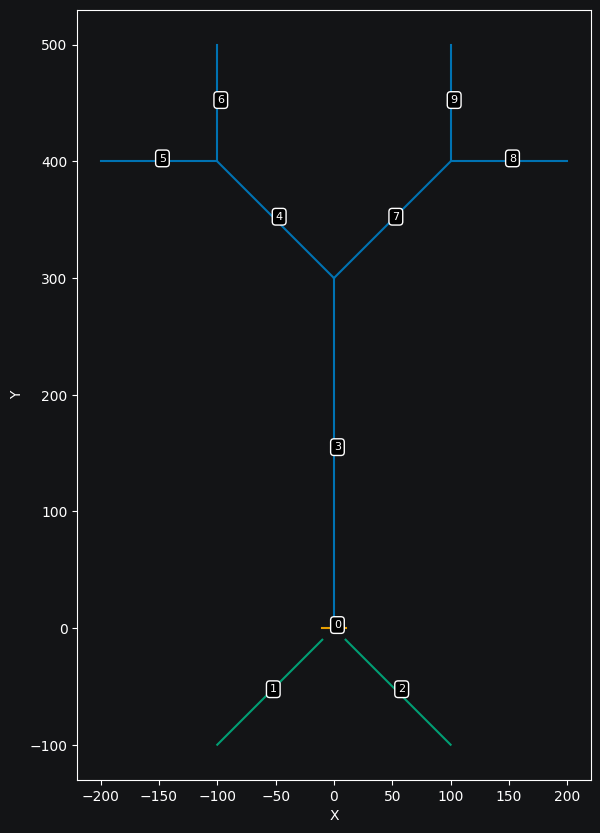

In [24]:
model.sec_tree.plot(annotate=True)

In [25]:
model.add_iclamp(sec=model.sec_tree[0], loc=0.5, amp=0.2, dur=800, delay=100)

IClamp added to sec JaxleySection(idx=0) at loc 0.5.


In [26]:
model.simulator.add_recording(sec=model.sec_tree[0], loc=0.5)

Added 1 recordings. See `.recordings` for details.


In [27]:
# model.simulator.add_recording(sec=model.sec_tree[-1], loc=0.5)

In [28]:
model.mechanisms['stdNa'].set_tadj(37)
model.mechanisms['stdKv'].set_tadj(37)

In [29]:
model.simulator.run(duration=1000)

Added 1 external_states. See `.externals` for details.


Text(0.5, 1.0, 'Jaxley')

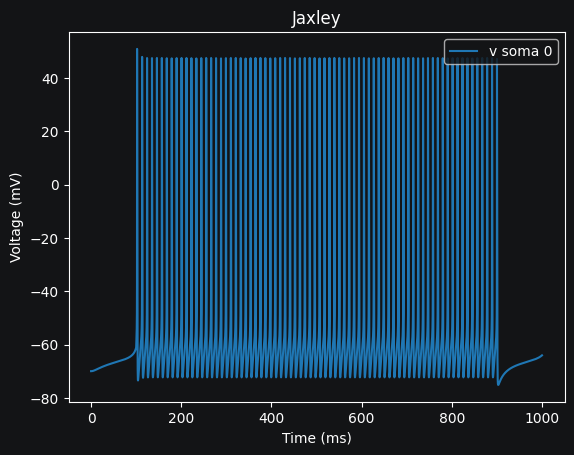

In [30]:
model.simulator.plot_voltage()
plt.title(model.simulator_name)

Text(0.5, 1.0, 'NEURON')

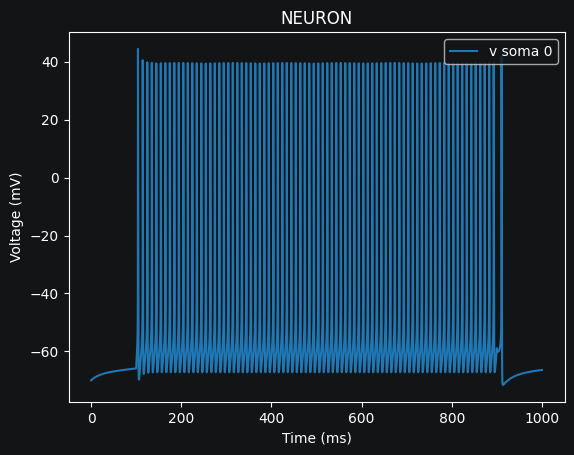

In [31]:
model.simulator.plot_voltage()
plt.title(model.simulator_name)